In [1]:
!pip install monai

In [2]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


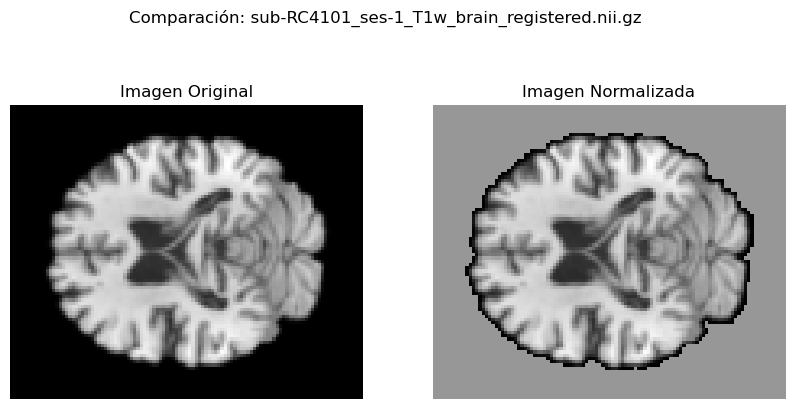

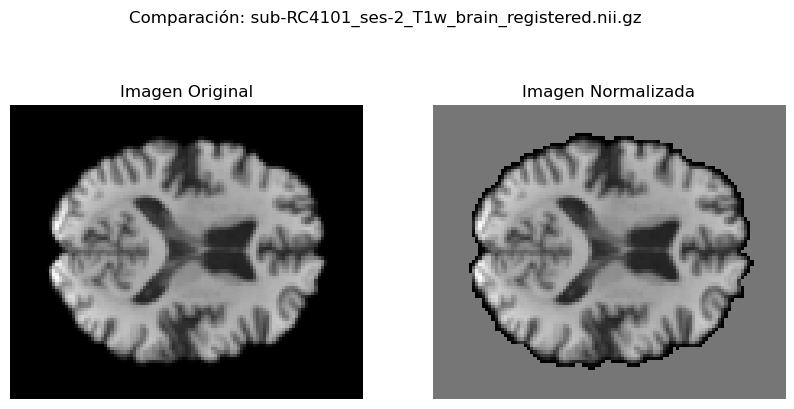

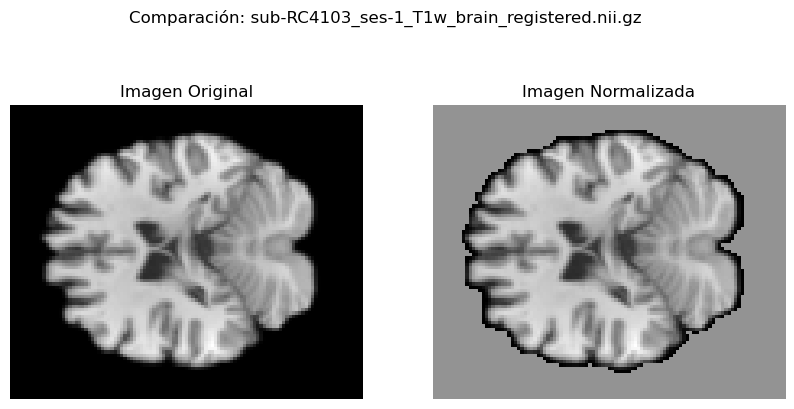

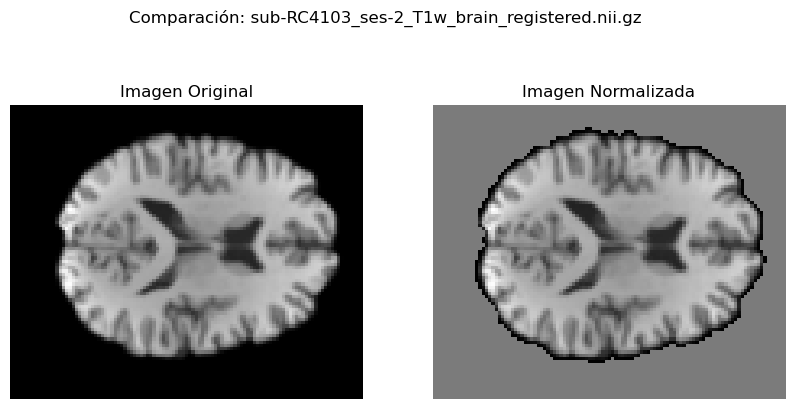

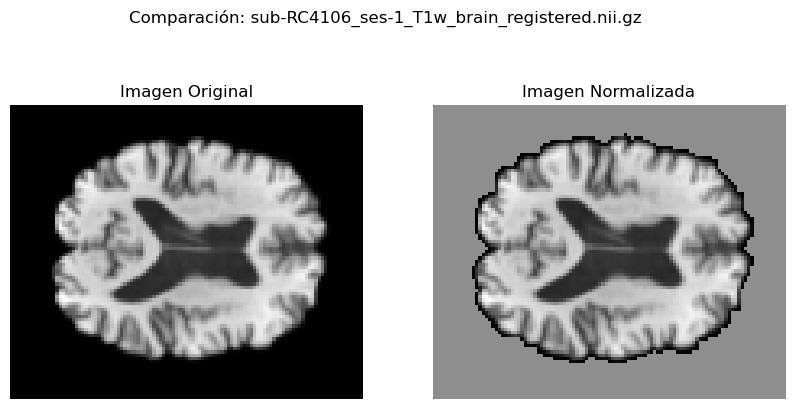

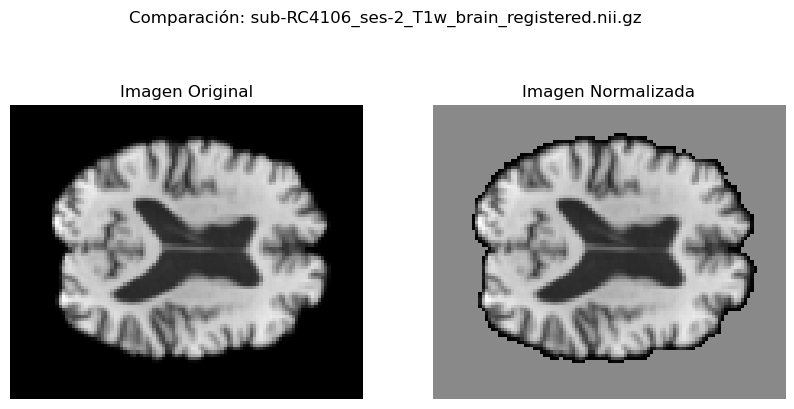

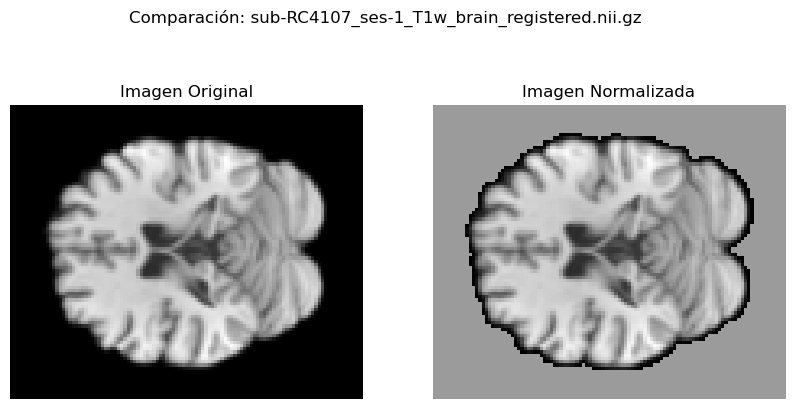

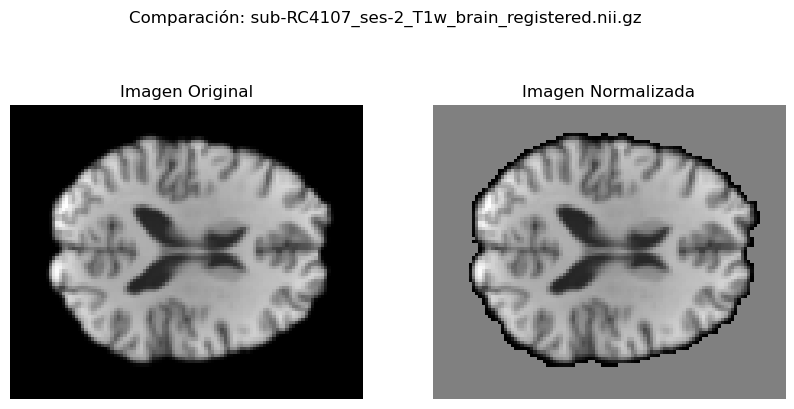

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from monai.transforms import ScaleIntensity, NormalizeIntensity, Compose
import torch

# Definir el pipeline de transformaciones
transform = Compose([ScaleIntensity(minv=0.0, maxv=1.0),NormalizeIntensity(nonzero=True)])
subjetos = ["sub-RC4101", "sub-RC4103", "sub-RC4106", "sub-RC4107"]
sesiones = ["ses-1", "ses-2"]
imag_norm = []
for sujeto in subjetos:
    for sesion in sesiones:
        ruta = f"output/derivatives/preprocessed/{sujeto}/{sesion}/anat/{sujeto}_{sesion}_T1w_brain_registered.nii.gz"
        imag_norm.append(ruta)

def graficar_imagenes(img_o, img_nor, titulo):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_o[:, :, img_o.shape[2] // 2], cmap='gray')  
    ax[0].set_title('Imagen Original')
    ax[0].axis('off')
    ax[1].imshow(img_nor[:, :, img_nor.shape[2] // 2], cmap='gray')  
    ax[1].set_title('Imagen Normalizada')
    ax[1].axis('off')
    plt.suptitle(titulo)
    plt.show()
for ruta in imag_norm:
    if os.path.exists(ruta):  
        img_o = nib.load(ruta).get_fdata()
        img_o_tensor = torch.tensor(img_o) 
        imagen_nor = transform(img_o_tensor)  
        graficar_imagenes(img_o, imagen_nor.numpy(), f'Comparación: {os.path.basename(ruta)}') 
    else:
        print(f"Archivo no encontrado: {ruta}")

Original min: 0.0, max: 561264.4375
Normalizada min: -2.211277723312378, max: 2.650599241256714


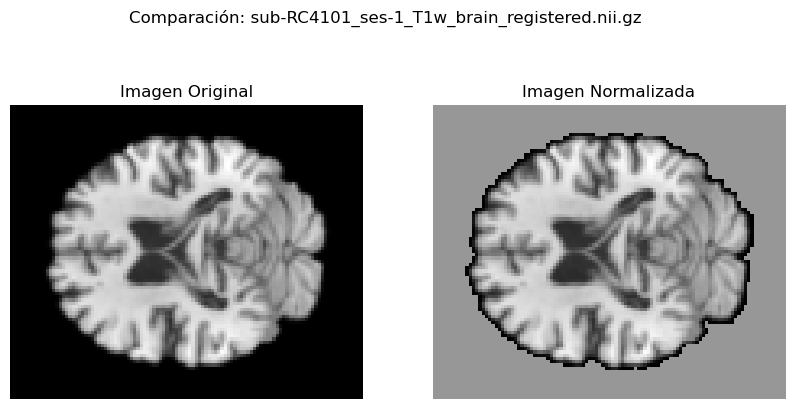

Original min: 0.0, max: 586017.375
Normalizada min: -2.2052314281463623, max: 2.7559375762939453


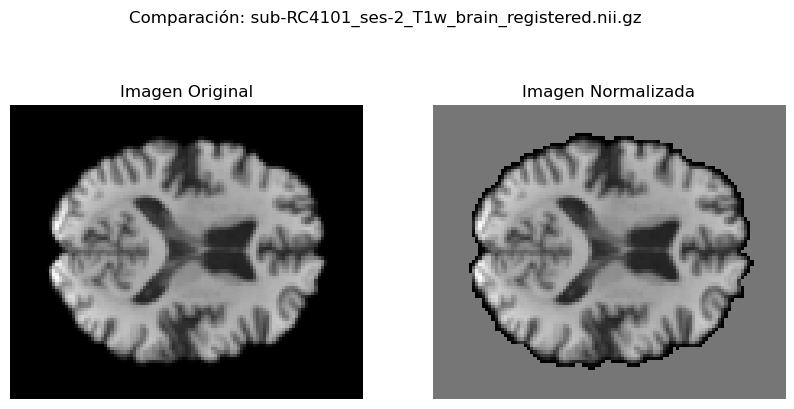

Original min: 0.0, max: 498769.65625
Normalizada min: -2.2385151386260986, max: 2.9652183055877686


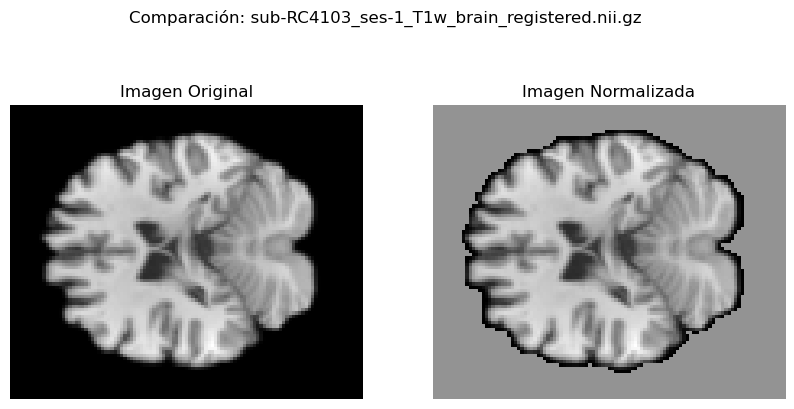

Original min: 0.0, max: 507896.5
Normalizada min: -2.2054381370544434, max: 3.1000330448150635


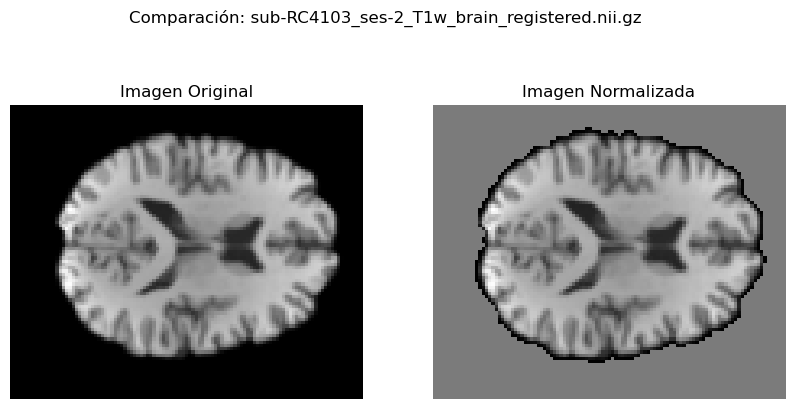

Original min: 0.0, max: 364863.25
Normalizada min: -2.150585412979126, max: 2.857518434524536


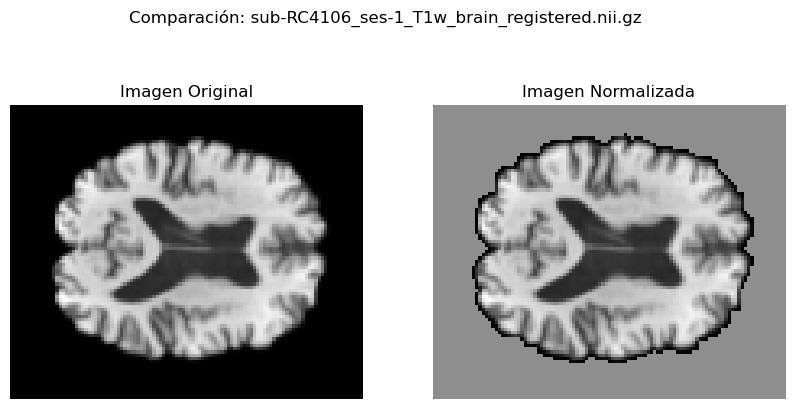

Original min: 0.0, max: 318592.625
Normalizada min: -2.118886947631836, max: 2.329061269760132


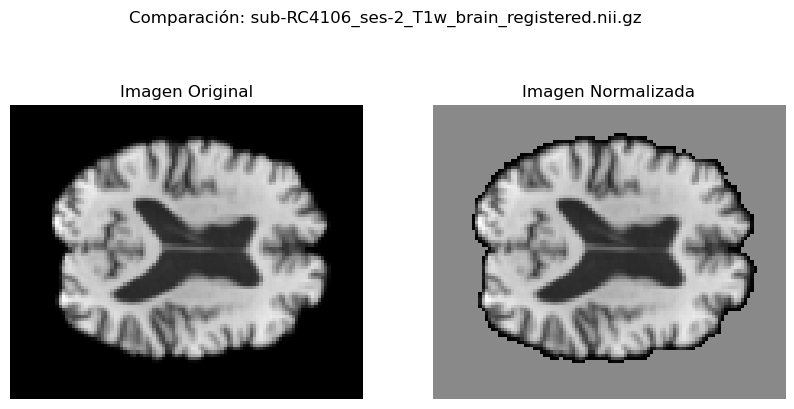

Original min: 0.0, max: 568850.125
Normalizada min: -2.226736068725586, max: 3.0023908615112305


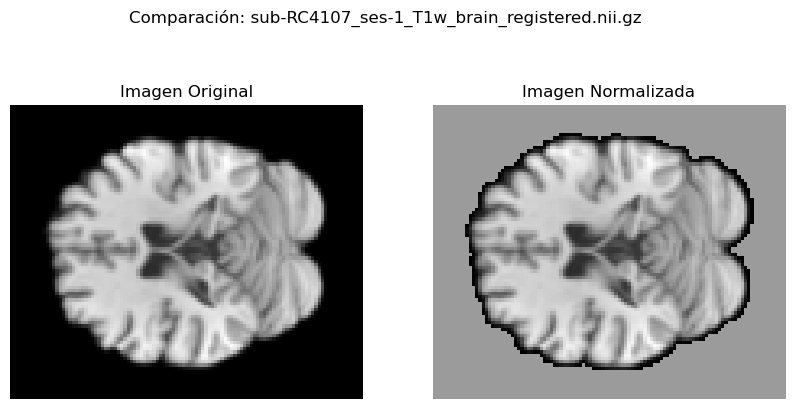

Original min: 0.0, max: 571827.5625
Normalizada min: -2.2960927486419678, max: 2.9528892040252686


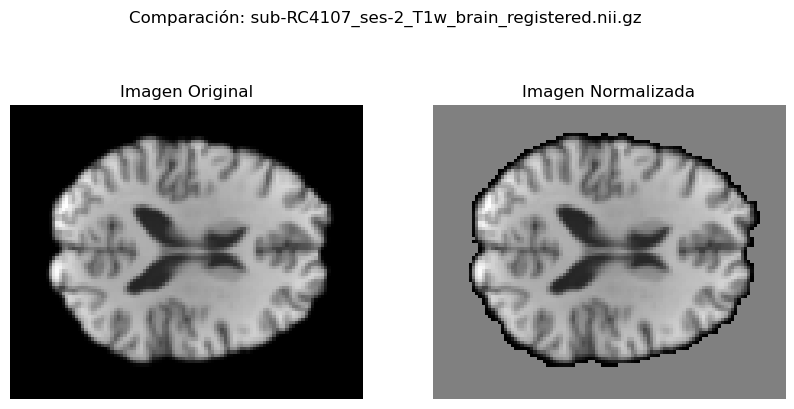

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from monai.transforms import ScaleIntensity, NormalizeIntensity, Compose
import torch

transform = Compose([
    ScaleIntensity(minv=0.0, maxv=1.0),      
    NormalizeIntensity(nonzero=True)     
])
subjetos = ["sub-RC4101", "sub-RC4103", "sub-RC4106", "sub-RC4107"]
sesiones = ["ses-1", "ses-2"]
imag_norm = []
for sujeto in subjetos:
    for sesion in sesiones:
        ruta = f"output/derivatives/preprocessed/{sujeto}/{sesion}/anat/{sujeto}_{sesion}_T1w_brain_registered.nii.gz"
        imag_norm.append(ruta)

def graficar_imagenes(img_o, img_nor, titulo):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    slice_index = img_o.shape[2] // 2 
    ax[0].imshow(img_o[:, :, slice_index], cmap='gray')  # Corte medio
    ax[0].set_title('Imagen Original')
    ax[0].axis('off')
    ax[1].imshow(img_nor[:, :, slice_index], cmap='gray') 
    ax[1].set_title('Imagen Normalizada')
    ax[1].axis('off')
    plt.suptitle(titulo)
    plt.show()
for ruta in imag_norm:
    if os.path.exists(ruta):  
        img_o = nib.load(ruta).get_fdata()
        img_o = img_o.astype(float) 
        img_o_tensor = torch.tensor(img_o)  
        imagen_nor = transform(img_o_tensor)  
        print(f'Original min: {img_o.min()}, max: {img_o.max()}')
        print(f'Normalizada min: {imagen_nor.min()}, max: {imagen_nor.max()}')
        graficar_imagenes(img_o, imagen_nor.numpy(), f'Comparación: {os.path.basename(ruta)}')
    else:
        print(f"Archivo no encontrado: {ruta}")

In [ ]:
for ruta in imag_norm:
    if os.path.exists(ruta):  
        img_o = nib.load(ruta).get_fdata()
        img_o = img_o.astype(float)  
        img_o_tensor = torch.tensor(img_o)  
        imagen_nor = transform(img_o_tensor) 
        print(f'Archivo: {os.path.basename(ruta)}')
        print(f'Original min: {img_o.min()}, max: {img_o.max()}')
        print(f'Normalizada min: {imagen_nor.min()}, max: {imagen_nor.max()}')
        slice_index = img_o.shape[2] // 2  # Corte medio
        print(f'Corte Original (slice {slice_index}):\n', img_o[:, :, slice_index])
        print(f'Corte Normalizado (slice {slice_index}):\n', imagen_nor.numpy()[:, :, slice_index])
        
    else:
        print(f"Archivo no encontrado: {ruta}")

In [ ]:
for ruta in imag_norm:
    if os.path.exists(ruta):  
        img_o = nib.load(ruta).get_fdata()
        img_o = img_o.astype(float)
        img_o_tensor = torch.tensor(img_o)
        imagen_nor = transform(img_o_tensor)

        ruta_norm = ruta.replace('.nii.gz', '_normalized.nii.gz')
        nib.save(nib.Nifti1Image(imagen_nor.numpy(), None), ruta_norm)  
        
        print(f"Imagen guardada: {ruta_norm}")


Imagen guardada: output/derivatives/preprocessed/sub-RC4101/ses-1/anat/sub-RC4101_ses-1_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4101/ses-2/anat/sub-RC4101_ses-2_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4103/ses-1/anat/sub-RC4103_ses-1_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4103/ses-2/anat/sub-RC4103_ses-2_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4106/ses-1/anat/sub-RC4106_ses-1_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4106/ses-2/anat/sub-RC4106_ses-2_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4107/ses-1/anat/sub-RC4107_ses-1_T1w_brain_registered_normalized.nii.gz
Imagen guardada: output/derivatives/preprocessed/sub-RC4107/ses-2/anat/sub-RC4107_ses-2_T1w_brain_registered_no